# 📊 Первичная аналитика: task_1_candles.csv

Этот ноутбук содержит первичную аналитику данных о свечах (OHLCV) для быстрого онбординга.


In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings

warnings.filterwarnings("ignore")

# Настройка стиля графиков
plt.style.use("seaborn-v0_8-darkgrid")
sns.set_palette("husl")
plt.rcParams["figure.figsize"] = (14, 6)
plt.rcParams["font.size"] = 10

## 1. Загрузка данных


In [44]:
# Загрузка данных
df = pd.read_csv("../data/processed/train_candles.csv")

# Конвертация даты
df["begin"] = pd.to_datetime(df["begin"])

# Сортировка
df = df.sort_values(["ticker", "begin"]).reset_index(drop=True)

print(f"Размер датасета: {df.shape}")
print(f"Период: {df['begin'].min()} - {df['begin'].max()}")
df.head(10)

Размер датасета: (12988, 8)
Период: 2020-06-19 00:00:00+00:00 - 2023-02-06 00:00:00+00:00


,ticker,begin,open,high,low,close,adj_close,volume
0,AFLT,2020-06-19 00:00:00+00:00,81.50,83.20,81.16,81.70,81.70,29755530.0
1,AFLT,2020-06-22 00:00:00+00:00,81.72,83.98,80.26,82.10,82.10,18502950.0
2,AFLT,2020-06-23 00:00:00+00:00,82.04,82.48,80.40,81.20,81.20,16848930.0
3,AFLT,2020-06-25 00:00:00+00:00,79.78,80.80,78.22,80.58,80.58,21559860.0
4,AFLT,2020-06-26 00:00:00+00:00,80.50,81.44,78.76,79.38,79.38,14677280.0
5,AFLT,2020-06-29 00:00:00+00:00,79.00,83.00,77.44,82.90,82.90,37790740.0
6,AFLT,2020-06-30 00:00:00+00:00,82.82,83.62,80.98,82.34,82.34,23644570.0
7,AFLT,2020-07-02 00:00:00+00:00,82.36,84.22,81.40,81.62,81.62,18886540.0
8,AFLT,2020-07-03 00:00:00+00:00,80.90,81.38,79.56,80.98,80.98,19891100.0
9,AFLT,2020-07-06 00:00:00+00:00,81.36,82.64,80.50,81.24,81.24,18364020.0


## 2. Общая информация о данных


In [45]:
# Информация о типах данных
print("=== Типы данных ===")
print(df.dtypes)
print("\n=== Пропущенные значения ===")
print(df.isnull().sum())
print("\n=== Базовая статистика ===")
df.describe()

=== Типы данных ===
ticker                    object
begin        datetime64[ns, UTC]
open                     float64
high                     float64
low                      float64
close                    float64
adj_close                float64
volume                   float64
dtype: object

=== Пропущенные значения ===
ticker       0
begin        0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

=== Базовая статистика ===


,open,high,low,close,adj_close,volume
count,12988.000000,12988.000000,12988.000000,12988.000000,12988.000000,1.298800e+04
mean,1465.293024,1488.218831,1438.237935,1464.392679,1464.392679,2.652584e+09
std,2032.500467,2063.985256,1995.458416,2031.062070,2031.062070,1.580134e+10
min,21.900000,23.280000,21.440000,22.440000,22.440000,1.263900e+04
25%,137.737500,139.667500,135.407500,137.632500,137.632500,4.158555e+05
50%,334.125000,337.000000,330.225000,334.200000,334.200000,2.030910e+06
75%,1770.050000,1795.500000,1731.550000,1769.037500,1769.037500,1.547273e+07
max,9000.000000,10097.000000,8500.000000,8908.000000,8908.000000,4.726287e+11


## 3. Анализ тикеров


In [46]:
# Список тикеров
tickers = df["ticker"].unique()
print(f"Количество уникальных тикеров: {len(tickers)}")
print(f"\nТикеры: {sorted(tickers)}")

Количество уникальных тикеров: 20

Тикеры: ['AFLT', 'ALRS', 'CHMF', 'GAZP', 'GMKN', 'LKOH', 'MAGN', 'MGNT', 'MOEX', 'MTSS', 'NVTK', 'PHOR', 'PLZL', 'ROSN', 'RUAL', 'SBER', 'SIBN', 'T', 'VTBR', 'YNDX']


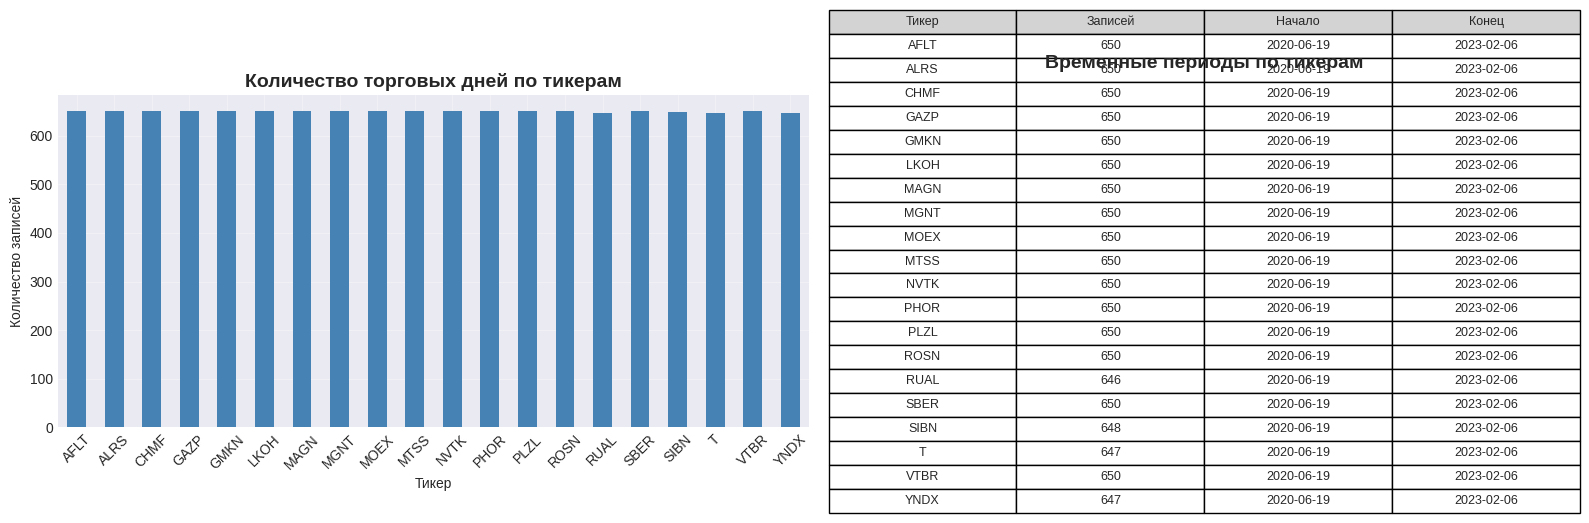


Статистика по тикерам:
count     20.000000
mean     649.400000
std        1.273206
min      646.000000
25%      650.000000
50%      650.000000
75%      650.000000
max      650.000000
Name: count, dtype: float64


In [47]:
# Количество записей по каждому тикеру
ticker_counts = df["ticker"].value_counts().sort_index()

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Барплот
ticker_counts.plot(kind="bar", ax=axes[0], color="steelblue")
axes[0].set_title("Количество торговых дней по тикерам", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Тикер")
axes[0].set_ylabel("Количество записей")
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(True, alpha=0.3)

# Таблица со статистикой
axes[1].axis("off")
table_data = []
for ticker in sorted(tickers):
    ticker_df = df[df["ticker"] == ticker]
    table_data.append([
        ticker,
        len(ticker_df),
        ticker_df["begin"].min().strftime("%Y-%m-%d"),
        ticker_df["begin"].max().strftime("%Y-%m-%d"),
    ])

table = axes[1].table(
    cellText=table_data,
    colLabels=["Тикер", "Записей", "Начало", "Конец"],
    cellLoc="center",
    loc="center",
    colColours=["lightgray"] * 4,
)
table.auto_set_font_size(False)
table.set_fontsize(9)
table.scale(1, 2)
axes[1].set_title("Временные периоды по тикерам", fontsize=14, fontweight="bold", pad=20)

plt.tight_layout()
plt.show()

print("\nСтатистика по тикерам:")
print(ticker_counts.describe())

## 4. Временной анализ


Общий период данных: 2020-06-19 - 2023-02-06
Длительность: 962 дней


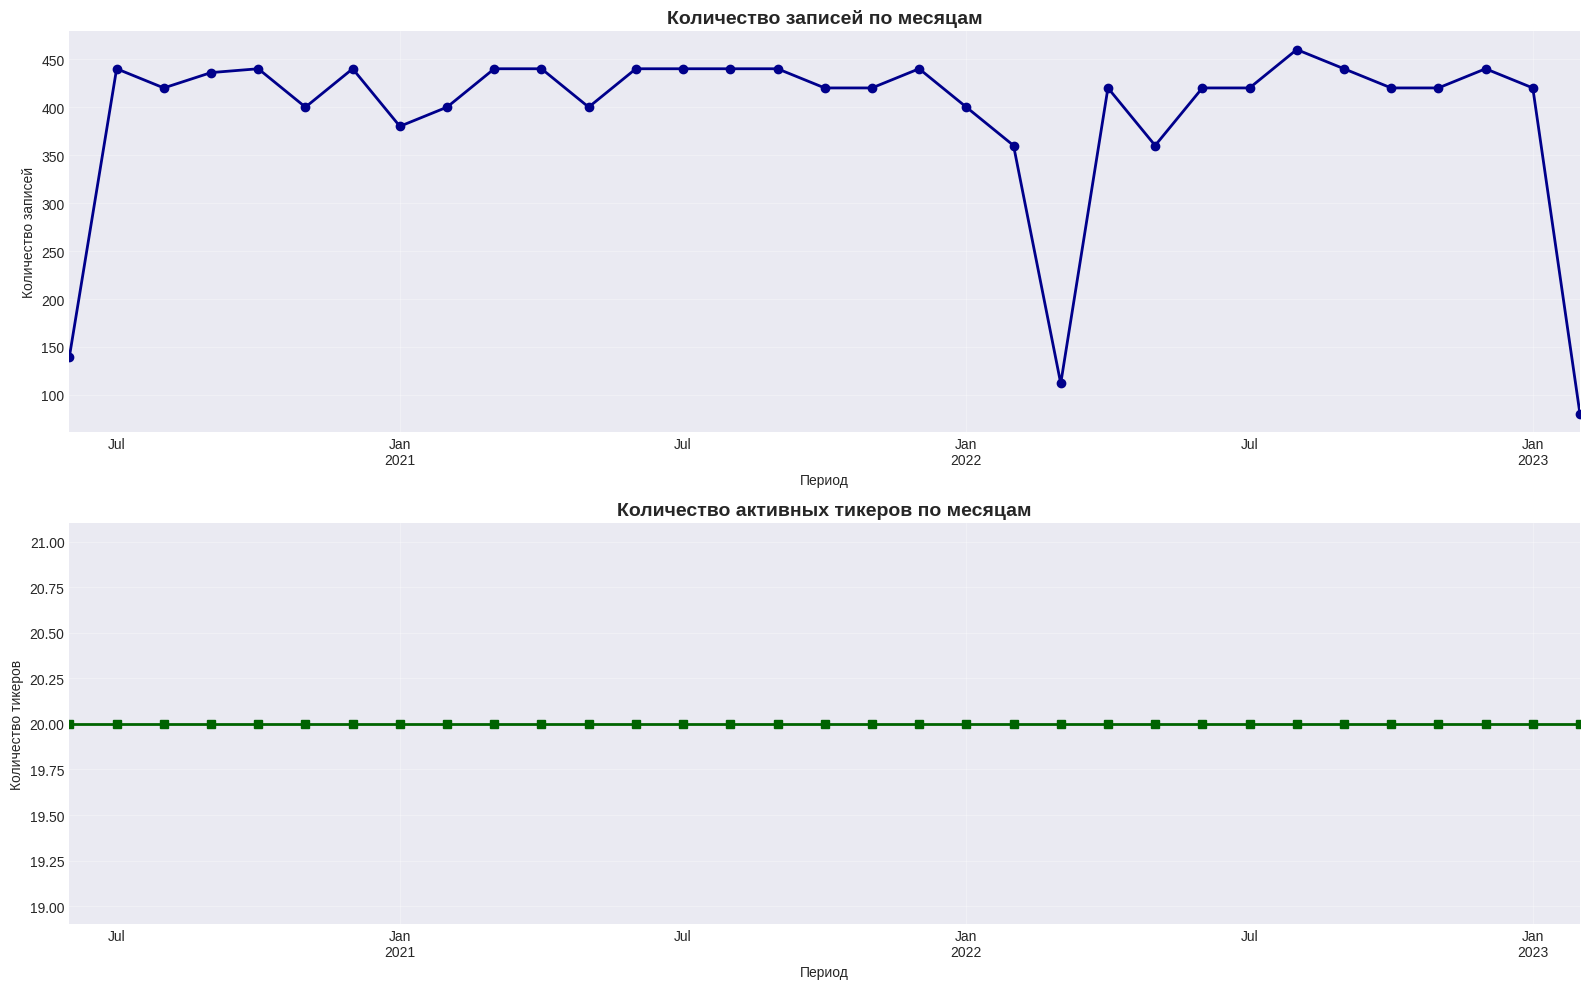

In [48]:
# Анализ временных периодов
print(f"Общий период данных: {df['begin'].min().date()} - {df['begin'].max().date()}")
print(f"Длительность: {(df['begin'].max() - df['begin'].min()).days} дней")

# Количество записей по времени
df["year"] = df["begin"].dt.year
df["month"] = df["begin"].dt.month
df["year_month"] = df["begin"].dt.to_period("M")

# Графики временных рядов
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Количество записей по месяцам
monthly_counts = df.groupby("year_month").size()
monthly_counts.plot(ax=axes[0], marker="o", linewidth=2, color="darkblue")
axes[0].set_title("Количество записей по месяцам", fontsize=14, fontweight="bold")
axes[0].set_xlabel("Период")
axes[0].set_ylabel("Количество записей")
axes[0].grid(True, alpha=0.3)

# Количество уникальных тикеров по месяцам
monthly_tickers = df.groupby("year_month")["ticker"].nunique()
monthly_tickers.plot(ax=axes[1], marker="s", linewidth=2, color="darkgreen")
axes[1].set_title("Количество активных тикеров по месяцам", fontsize=14, fontweight="bold")
axes[1].set_xlabel("Период")
axes[1].set_ylabel("Количество тикеров")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Анализ цен


=== Статистика по ценам ===
               open         close          high           low
count  12988.000000  12988.000000  12988.000000  12988.000000
mean    1465.293024   1464.392679   1488.218831   1438.237935
std     2032.500467   2031.062070   2063.985256   1995.458416
min       21.900000     22.440000     23.280000     21.440000
25%      137.737500    137.632500    139.667500    135.407500
50%      334.125000    334.200000    337.000000    330.225000
75%     1770.050000   1769.037500   1795.500000   1731.550000
max     9000.000000   8908.000000  10097.000000   8500.000000


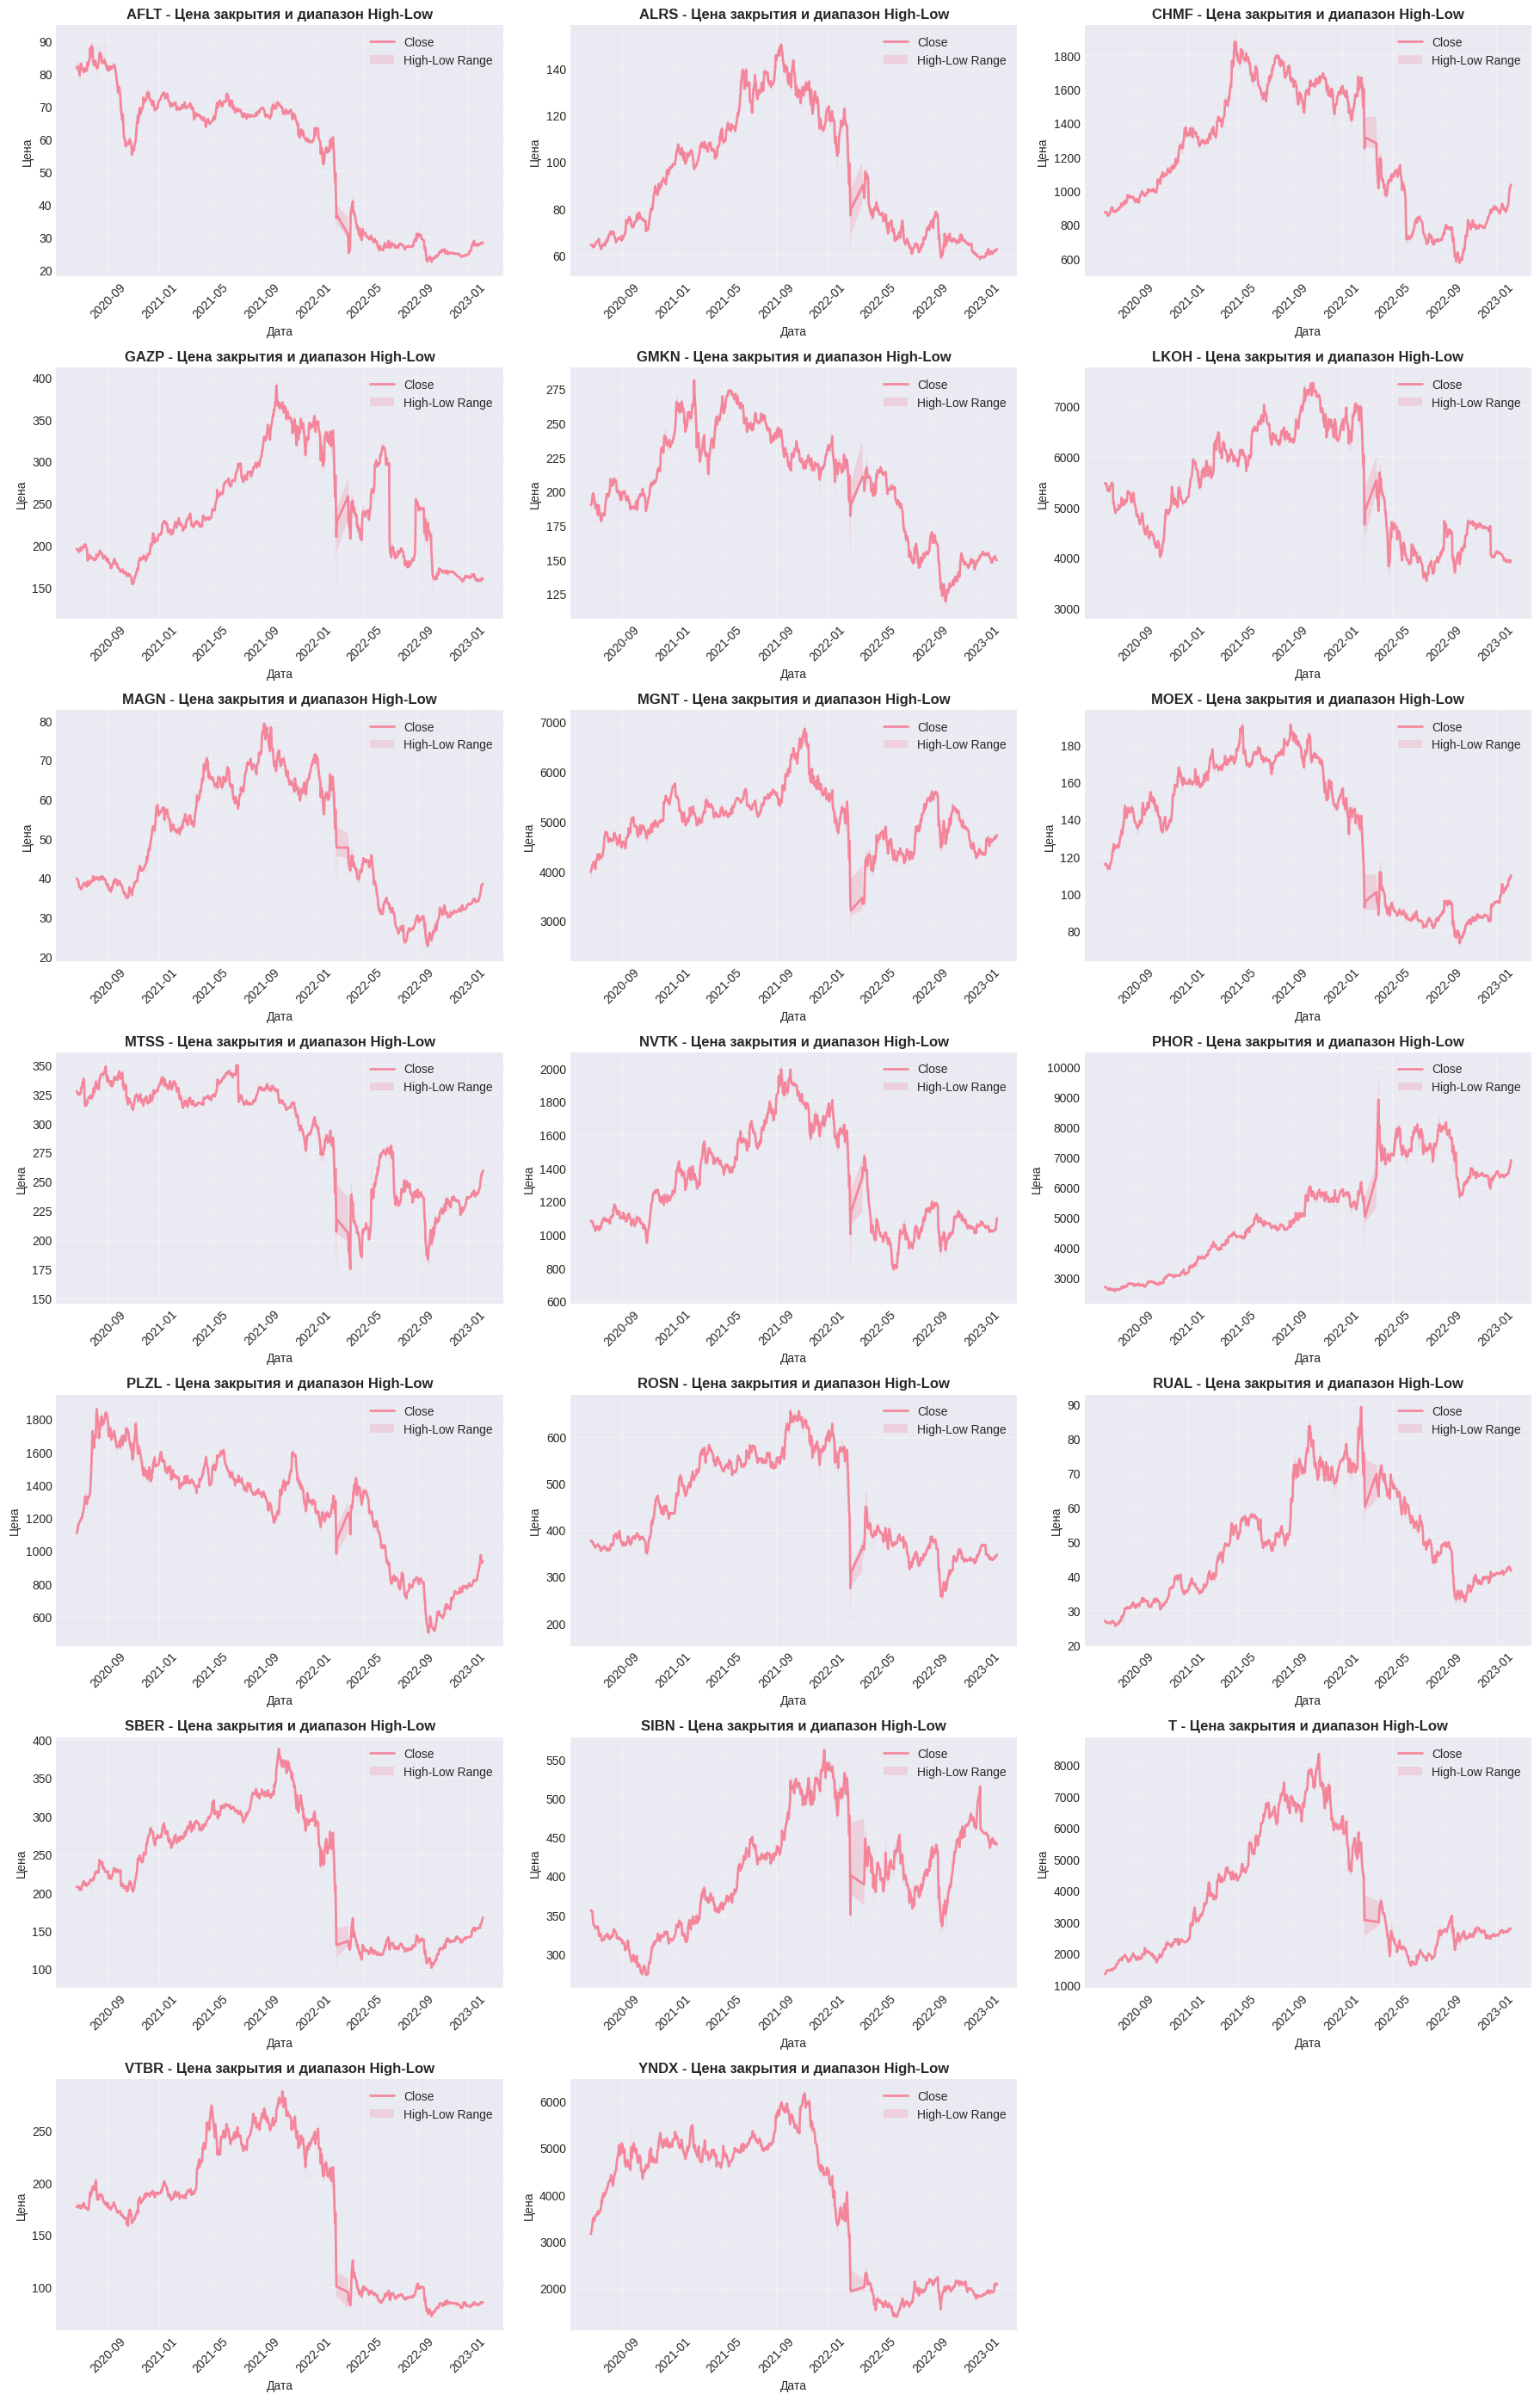

In [49]:
# Статистика по ценам
print("=== Статистика по ценам ===")
print(df[["open", "close", "high", "low"]].describe())

# Графики цен для каждого тикера
n_tickers = len(tickers)
n_cols = 3
n_rows = (n_tickers + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, n_rows * 4))
axes = axes.flatten() if n_tickers > 1 else [axes]

for idx, ticker in enumerate(sorted(tickers)):
    ticker_df = df[df["ticker"] == ticker].sort_values("begin")
    ax = axes[idx]

    ax.plot(ticker_df["begin"], ticker_df["close"], label="Close", linewidth=2, alpha=0.8)
    ax.fill_between(ticker_df["begin"], ticker_df["low"], ticker_df["high"], alpha=0.2, label="High-Low Range")

    ax.set_title(f"{ticker} - Цена закрытия и диапазон High-Low", fontweight="bold")
    ax.set_xlabel("Дата")
    ax.set_ylabel("Цена")
    ax.legend(loc="best")
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis="x", rotation=45)

# Скрыть лишние subplot'ы
for idx in range(n_tickers, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()

## 6. Анализ доходности


In [50]:
# Расчет дневной доходности
df["daily_return"] = df.groupby("ticker")["close"].pct_change()
df["intraday_return"] = (df["close"] - df["open"]) / df["open"]

print("=== Статистика доходности ===")
print(df[["daily_return", "intraday_return"]].describe())

=== Статистика доходности ===
       daily_return  intraday_return
count  12968.000000     12988.000000
mean       0.000279        -0.000375
std        0.026390         0.024432
min       -0.412538        -0.341200
25%       -0.010171        -0.010595
50%        0.000141        -0.000630
75%        0.011132         0.010091
max        0.333715         0.315270


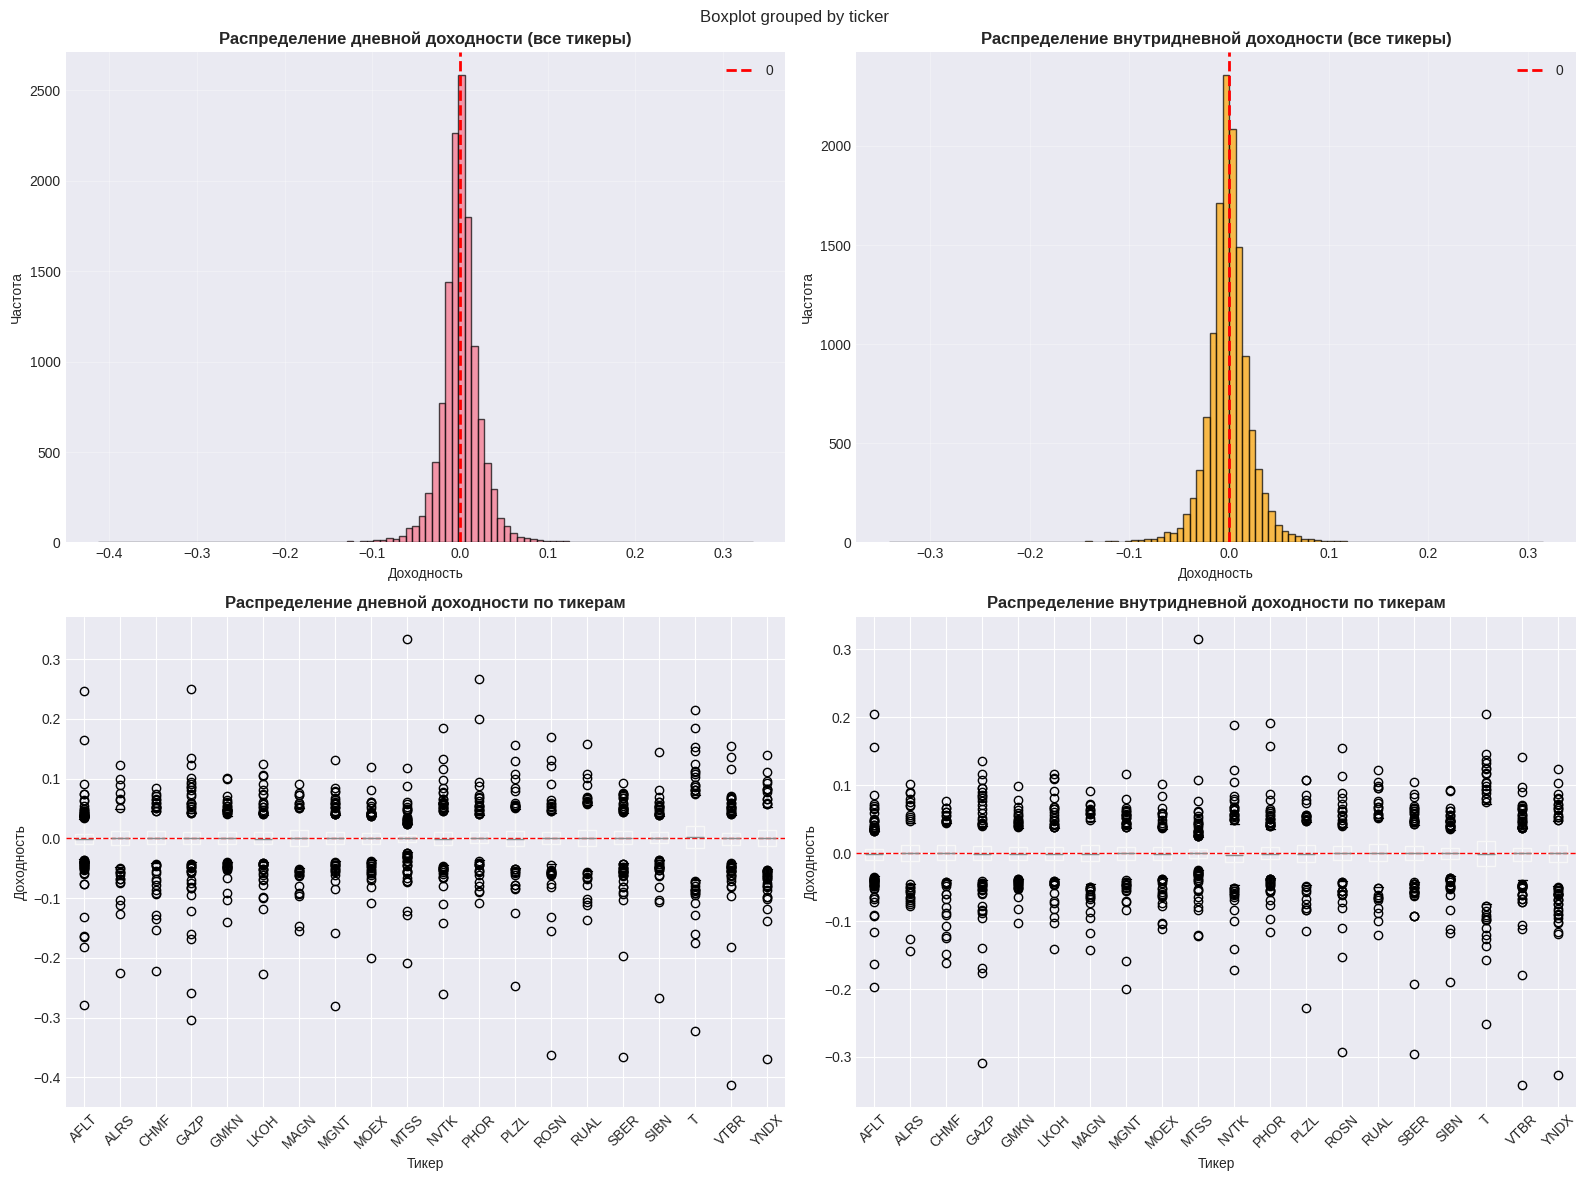

In [51]:
# Распределение доходностей
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Дневная доходность - гистограмма
df["daily_return"].dropna().hist(bins=100, ax=axes[0, 0], edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Распределение дневной доходности (все тикеры)", fontweight="bold")
axes[0, 0].set_xlabel("Доходность")
axes[0, 0].set_ylabel("Частота")
axes[0, 0].axvline(0, color="red", linestyle="--", linewidth=2, label="0")
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# Внутридневная доходность - гистограмма
df["intraday_return"].dropna().hist(bins=100, ax=axes[0, 1], edgecolor="black", alpha=0.7, color="orange")
axes[0, 1].set_title("Распределение внутридневной доходности (все тикеры)", fontweight="bold")
axes[0, 1].set_xlabel("Доходность")
axes[0, 1].set_ylabel("Частота")
axes[0, 1].axvline(0, color="red", linestyle="--", linewidth=2, label="0")
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# Boxplot по тикерам - дневная доходность
df.boxplot(column="daily_return", by="ticker", ax=axes[1, 0])
axes[1, 0].set_title("Распределение дневной доходности по тикерам", fontweight="bold")
axes[1, 0].set_xlabel("Тикер")
axes[1, 0].set_ylabel("Доходность")
axes[1, 0].axhline(0, color="red", linestyle="--", linewidth=1)
plt.sca(axes[1, 0])
plt.xticks(rotation=45)

# Boxplot по тикерам - внутридневная доходность
df.boxplot(column="intraday_return", by="ticker", ax=axes[1, 1])
axes[1, 1].set_title("Распределение внутридневной доходности по тикерам", fontweight="bold")
axes[1, 1].set_xlabel("Тикер")
axes[1, 1].set_ylabel("Доходность")
axes[1, 1].axhline(0, color="red", linestyle="--", linewidth=1)
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


=== Статистика дневной доходности по тикерам ===
        Средняя  Ст. откл.  Минимум  Максимум  Медиана
ticker                                                
AFLT    -0.0012     0.0277  -0.2791    0.2472  -0.0009
ALRS     0.0003     0.0246  -0.2245    0.1230   0.0011
CHMF     0.0006     0.0245  -0.2211    0.0842   0.0014
GAZP     0.0002     0.0308  -0.3046    0.2495   0.0000
GMKN    -0.0002     0.0205  -0.1395    0.1017   0.0000
LKOH    -0.0002     0.0238  -0.2276    0.1241  -0.0005
MAGN     0.0002     0.0241  -0.1549    0.0914   0.0000
MGNT     0.0006     0.0236  -0.2800    0.1320   0.0005
MOEX     0.0001     0.0206  -0.2008    0.1201  -0.0001
MTSS    -0.0001     0.0228  -0.2078    0.3337   0.0003
NVTK     0.0004     0.0272  -0.2604    0.1848  -0.0012
PHOR     0.0017     0.0237  -0.1075    0.2662   0.0005
PLZL     0.0001     0.0262  -0.2462    0.1568  -0.0008
ROSN     0.0003     0.0270  -0.3631    0.1697   0.0003
RUAL     0.0010     0.0265  -0.1366    0.1581   0.0006
SBER     0.0001

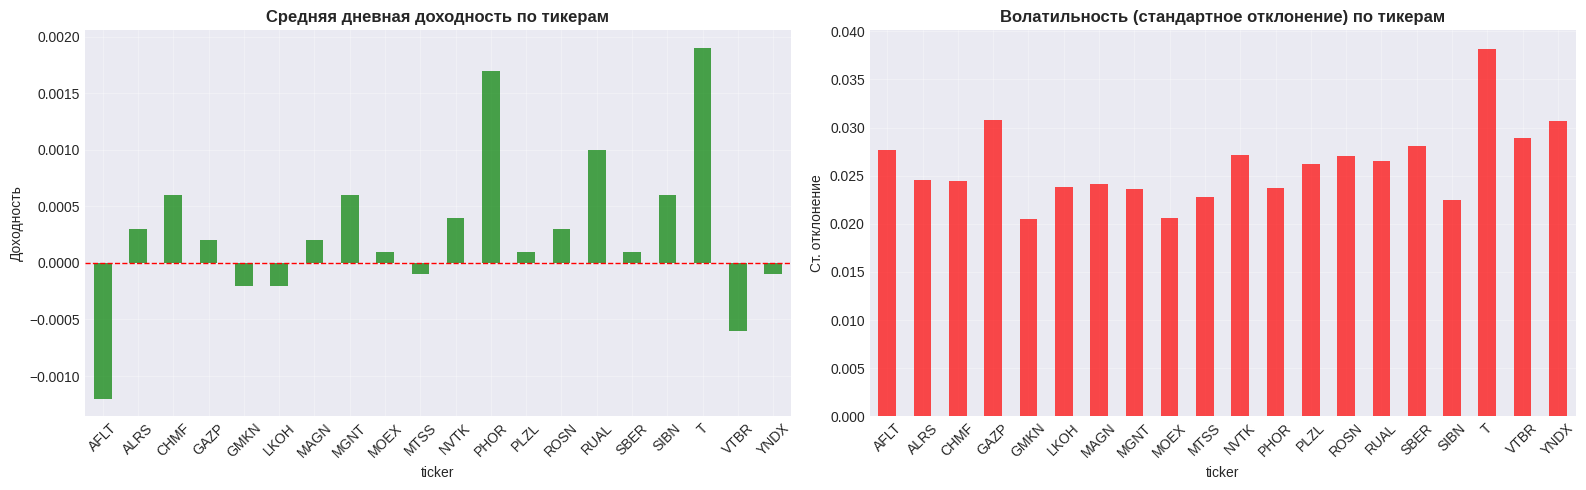

In [52]:
# Статистика доходности по тикерам
returns_stats = (
    df.groupby("ticker")["daily_return"]
    .agg([("mean", "mean"), ("std", "std"), ("min", "min"), ("max", "max"), ("median", "median")])
    .round(4)
)

returns_stats.columns = ["Средняя", "Ст. откл.", "Минимум", "Максимум", "Медиана"]
print("\n=== Статистика дневной доходности по тикерам ===")
print(returns_stats)

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(16, 5))

returns_stats["Средняя"].plot(kind="bar", ax=axes[0], color="green", alpha=0.7)
axes[0].set_title("Средняя дневная доходность по тикерам", fontweight="bold")
axes[0].set_ylabel("Доходность")
axes[0].axhline(0, color="red", linestyle="--", linewidth=1)
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(True, alpha=0.3)

returns_stats["Ст. откл."].plot(kind="bar", ax=axes[1], color="red", alpha=0.7)
axes[1].set_title("Волатильность (стандартное отклонение) по тикерам", fontweight="bold")
axes[1].set_ylabel("Ст. отклонение")
axes[1].tick_params(axis="x", rotation=45)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Анализ объемов торгов


In [53]:
# Статистика по объемам
print("=== Статистика по объемам торгов ===")
print(df["volume"].describe())

volume_stats = (
    df.groupby("ticker")["volume"]
    .agg([("mean", "mean"), ("median", "median"), ("std", "std"), ("min", "min"), ("max", "max")])
    .round(0)
)

print("\n=== Объемы торгов по тикерам ===")
print(volume_stats)

=== Статистика по объемам торгов ===
count    1.298800e+04
mean     2.652584e+09
std      1.580134e+10
min      1.263900e+04
25%      4.158555e+05
50%      2.030910e+06
75%      1.547273e+07
max      4.726287e+11
Name: volume, dtype: float64

=== Объемы торгов по тикерам ===
                mean        median           std           min           max
ticker                                                                      
AFLT    1.413903e+07  1.020102e+07  1.340938e+07  1.638750e+06  1.578783e+08
ALRS    1.879991e+07  1.615541e+07  1.464847e+07  1.505190e+06  1.430264e+08
CHMF    1.216368e+06  1.065276e+06  8.730240e+05  1.674620e+05  1.174204e+07
GAZP    5.160378e+07  4.102273e+07  4.333350e+07  5.247160e+06  4.140240e+08
GMKN    2.478700e+05  2.115980e+05  2.061250e+05  1.890900e+04  1.718063e+06
LKOH    1.041139e+06  9.127860e+05  6.837650e+05  1.231200e+05  5.901625e+06
MAGN    2.818786e+07  2.357292e+07  2.205000e+07  2.507840e+06  2.878956e+08
MGNT    3.381210e+05  2.982760e

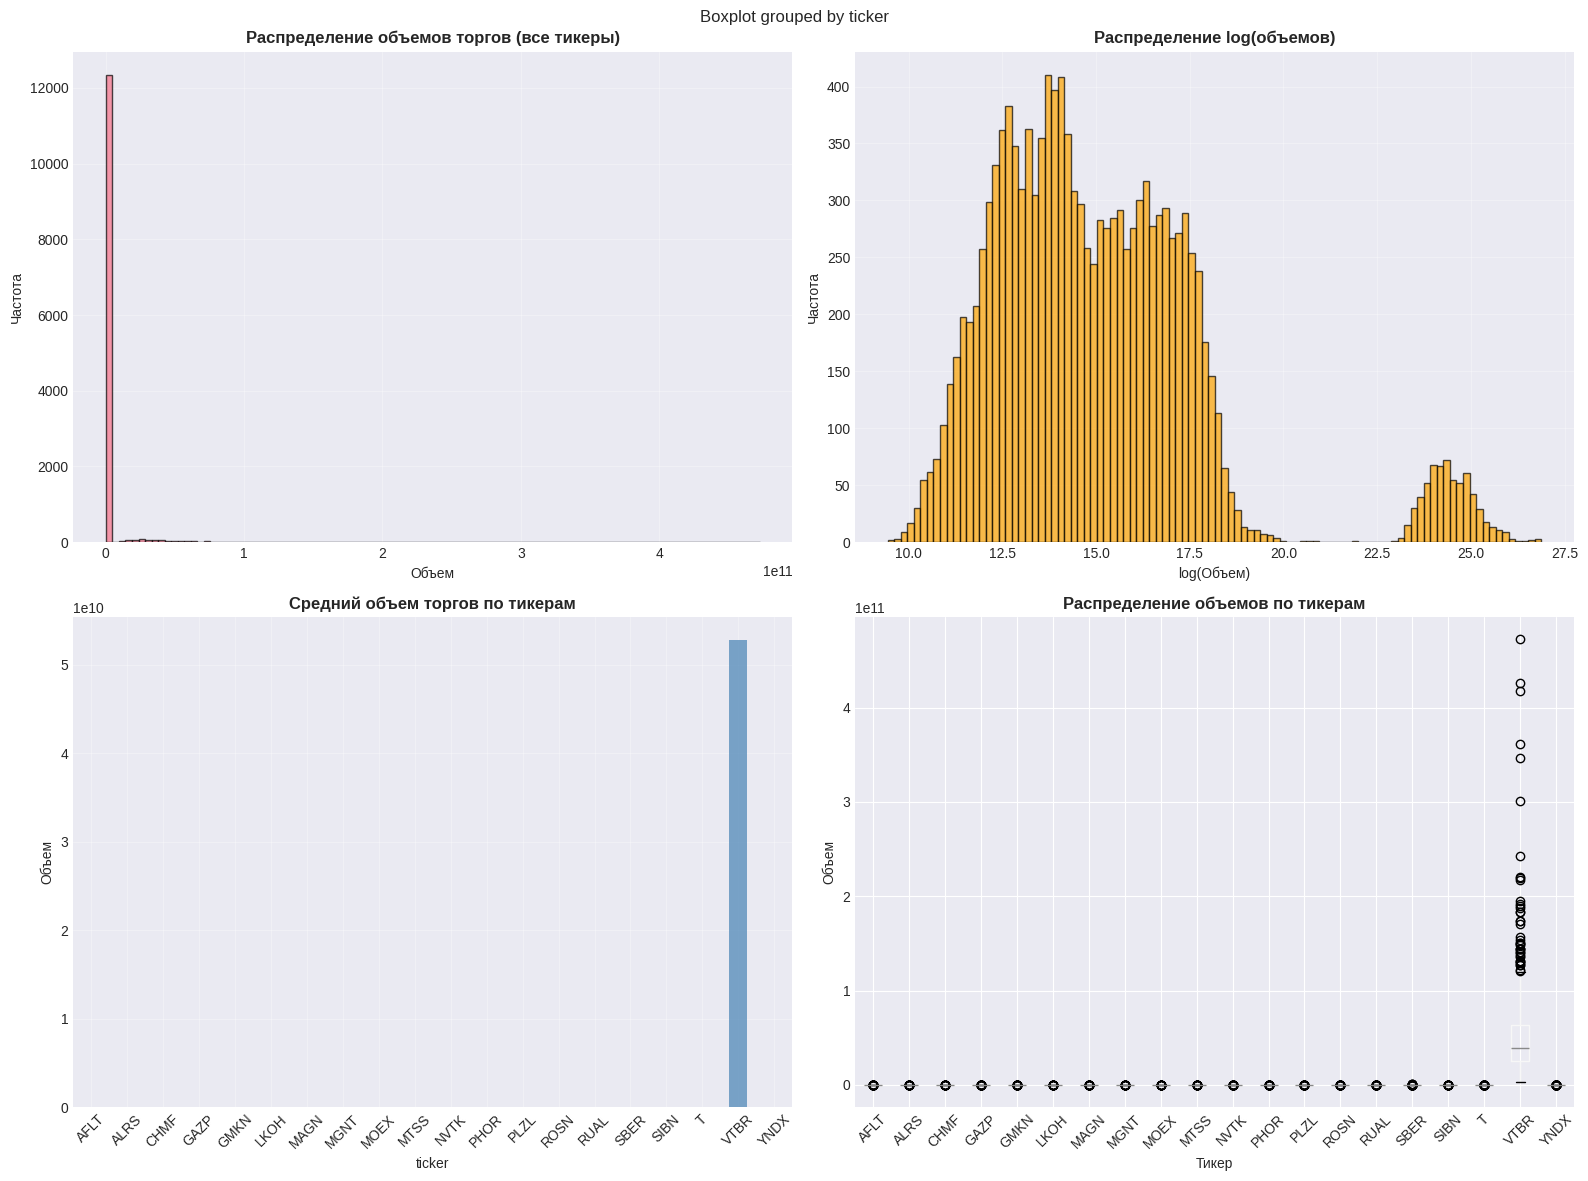

In [54]:
# Визуализация объемов
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Распределение объемов
df["volume"].hist(bins=100, ax=axes[0, 0], edgecolor="black", alpha=0.7)
axes[0, 0].set_title("Распределение объемов торгов (все тикеры)", fontweight="bold")
axes[0, 0].set_xlabel("Объем")
axes[0, 0].set_ylabel("Частота")
axes[0, 0].grid(True, alpha=0.3)

# Логарифм объемов (для лучшей визуализации)
df["log_volume"] = np.log1p(df["volume"])
df["log_volume"].hist(bins=100, ax=axes[0, 1], edgecolor="black", alpha=0.7, color="orange")
axes[0, 1].set_title("Распределение log(объемов)", fontweight="bold")
axes[0, 1].set_xlabel("log(Объем)")
axes[0, 1].set_ylabel("Частота")
axes[0, 1].grid(True, alpha=0.3)

# Средний объем по тикерам
volume_stats["mean"].plot(kind="bar", ax=axes[1, 0], color="steelblue", alpha=0.7)
axes[1, 0].set_title("Средний объем торгов по тикерам", fontweight="bold")
axes[1, 0].set_ylabel("Объем")
axes[1, 0].tick_params(axis="x", rotation=45)
axes[1, 0].grid(True, alpha=0.3)

# Boxplot объемов по тикерам
df.boxplot(column="volume", by="ticker", ax=axes[1, 1])
axes[1, 1].set_title("Распределение объемов по тикерам", fontweight="bold")
axes[1, 1].set_xlabel("Тикер")
axes[1, 1].set_ylabel("Объем")
plt.sca(axes[1, 1])
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

## 8. Анализ волатильности


In [55]:
# Расчет различных мер волатильности
df["price_range"] = df["high"] - df["low"]
df["price_range_pct"] = (df["high"] - df["low"]) / df["low"] * 100

# Скользящая волатильность (окно 20 дней)
df["rolling_volatility"] = df.groupby("ticker")["daily_return"].transform(
    lambda x: x.rolling(window=20, min_periods=1).std()
)

print("=== Статистика волатильности ===")
print(df[["price_range", "price_range_pct", "rolling_volatility"]].describe())

=== Статистика волатильности ===
        price_range  price_range_pct  rolling_volatility
count  12988.000000     12988.000000        12948.000000
mean      49.980896         3.413237            0.021640
std      101.750712         4.079019            0.015163
min        0.200000         0.315906            0.000452
25%        3.090000         1.765599            0.013392
50%        8.625000         2.569754            0.017604
75%       58.000000         3.847592            0.024615
max     2391.000000       134.314574            0.122430


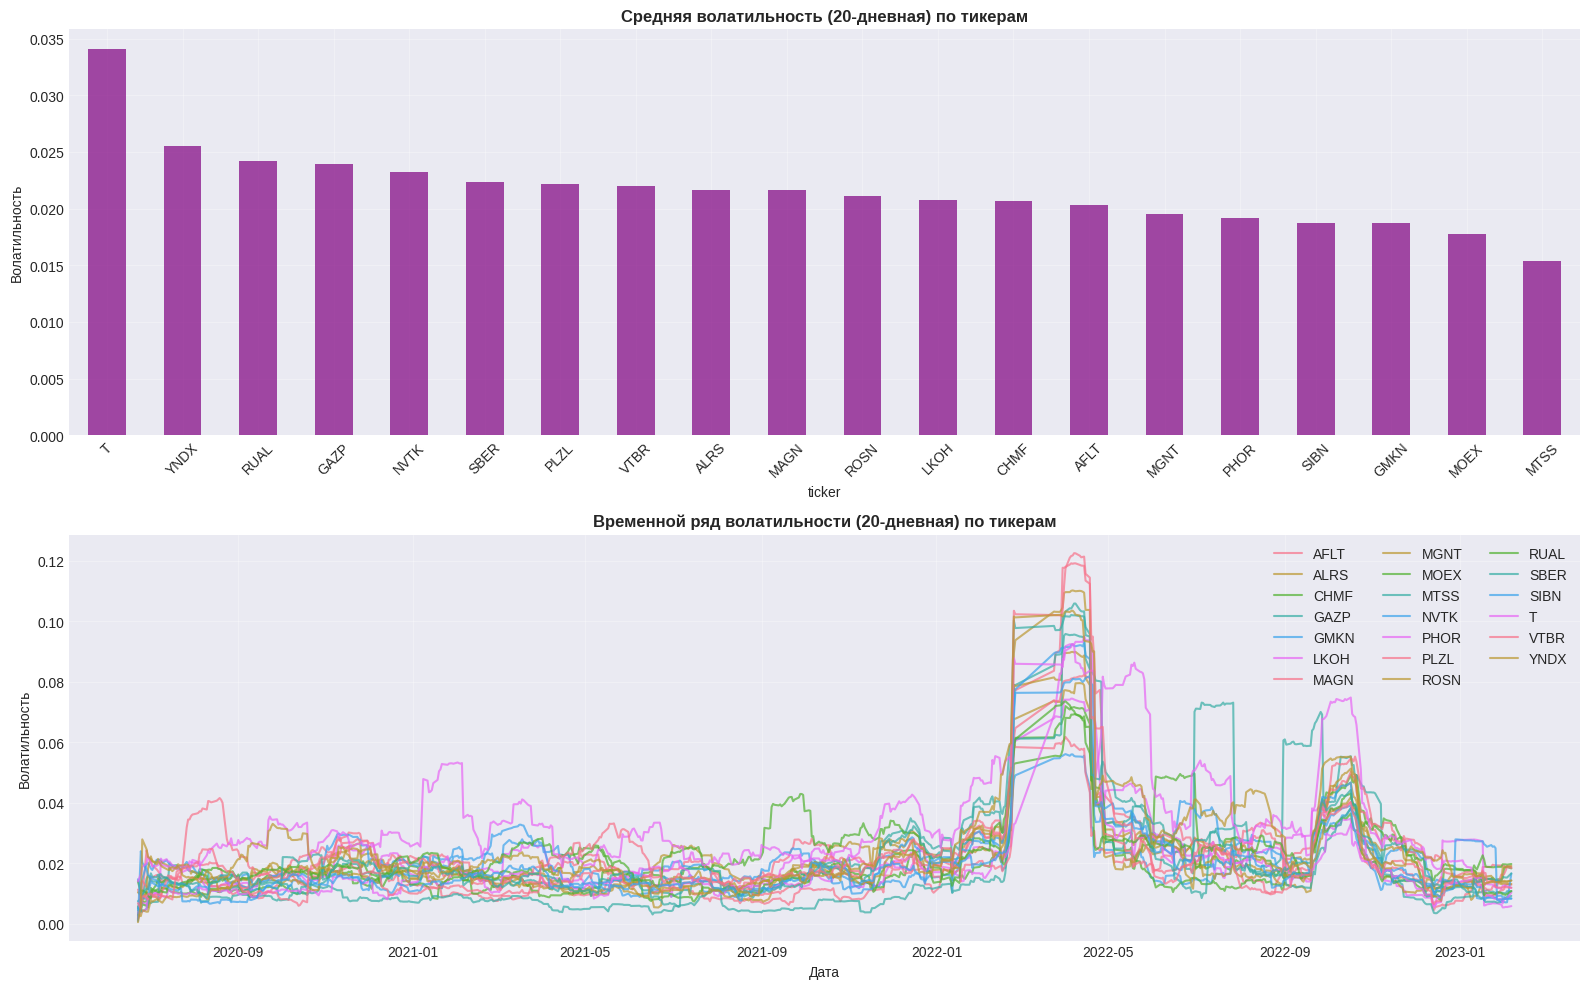

In [56]:
# Визуализация волатильности
fig, axes = plt.subplots(2, 1, figsize=(16, 10))

# Средняя волатильность по тикерам
volatility_by_ticker = df.groupby("ticker")["rolling_volatility"].mean().sort_values(ascending=False)
volatility_by_ticker.plot(kind="bar", ax=axes[0], color="purple", alpha=0.7)
axes[0].set_title("Средняя волатильность (20-дневная) по тикерам", fontweight="bold")
axes[0].set_ylabel("Волатильность")
axes[0].tick_params(axis="x", rotation=45)
axes[0].grid(True, alpha=0.3)

# Временной ряд волатильности для всех тикеров
for ticker in sorted(tickers):
    ticker_df = df[df["ticker"] == ticker].sort_values("begin")
    axes[1].plot(ticker_df["begin"], ticker_df["rolling_volatility"], label=ticker, alpha=0.7, linewidth=1.5)

axes[1].set_title("Временной ряд волатильности (20-дневная) по тикерам", fontweight="bold")
axes[1].set_xlabel("Дата")
axes[1].set_ylabel("Волатильность")
axes[1].legend(loc="best", ncol=3)
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 9. Корреляционный анализ


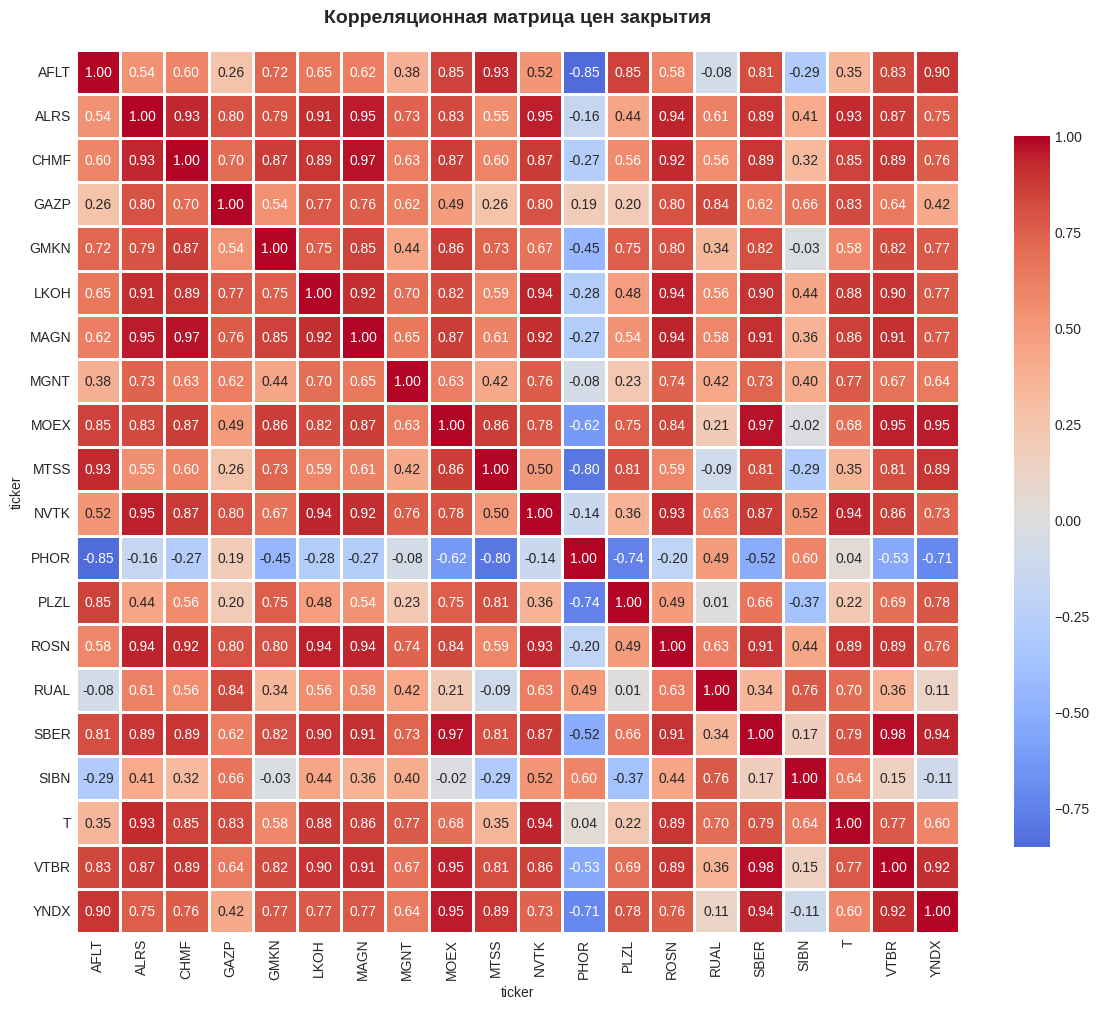


=== Корреляционная матрица ===
ticker      AFLT      ALRS      CHMF      GAZP      GMKN      LKOH      MAGN  \
ticker                                                                         
AFLT    1.000000  0.536341  0.597972  0.256028  0.719722  0.646639  0.621843   
ALRS    0.536341  1.000000  0.930672  0.804362  0.790452  0.914875  0.950986   
CHMF    0.597972  0.930672  1.000000  0.696253  0.865686  0.891220  0.970999   
GAZP    0.256028  0.804362  0.696253  1.000000  0.542388  0.769482  0.756783   
GMKN    0.719722  0.790452  0.865686  0.542388  1.000000  0.748010  0.850633   
LKOH    0.646639  0.914875  0.891220  0.769482  0.748010  1.000000  0.918763   
MAGN    0.621843  0.950986  0.970999  0.756783  0.850633  0.918763  1.000000   
MGNT    0.380259  0.734465  0.626917  0.620031  0.436902  0.695644  0.649051   
MOEX    0.850199  0.830320  0.868852  0.488809  0.864554  0.820389  0.869679   
MTSS    0.927090  0.546382  0.595662  0.261320  0.725945  0.587821  0.606431   
NVTK    

In [57]:
# Создаем pivot таблицу с ценами закрытия
pivot_close = df.pivot_table(index="begin", columns="ticker", values="close", aggfunc="mean")

# Расчет корреляций
correlation_matrix = pivot_close.corr()

# Визуализация
fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    correlation_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=ax,
)
ax.set_title("Корреляционная матрица цен закрытия", fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

print("\n=== Корреляционная матрица ===")
print(correlation_matrix)

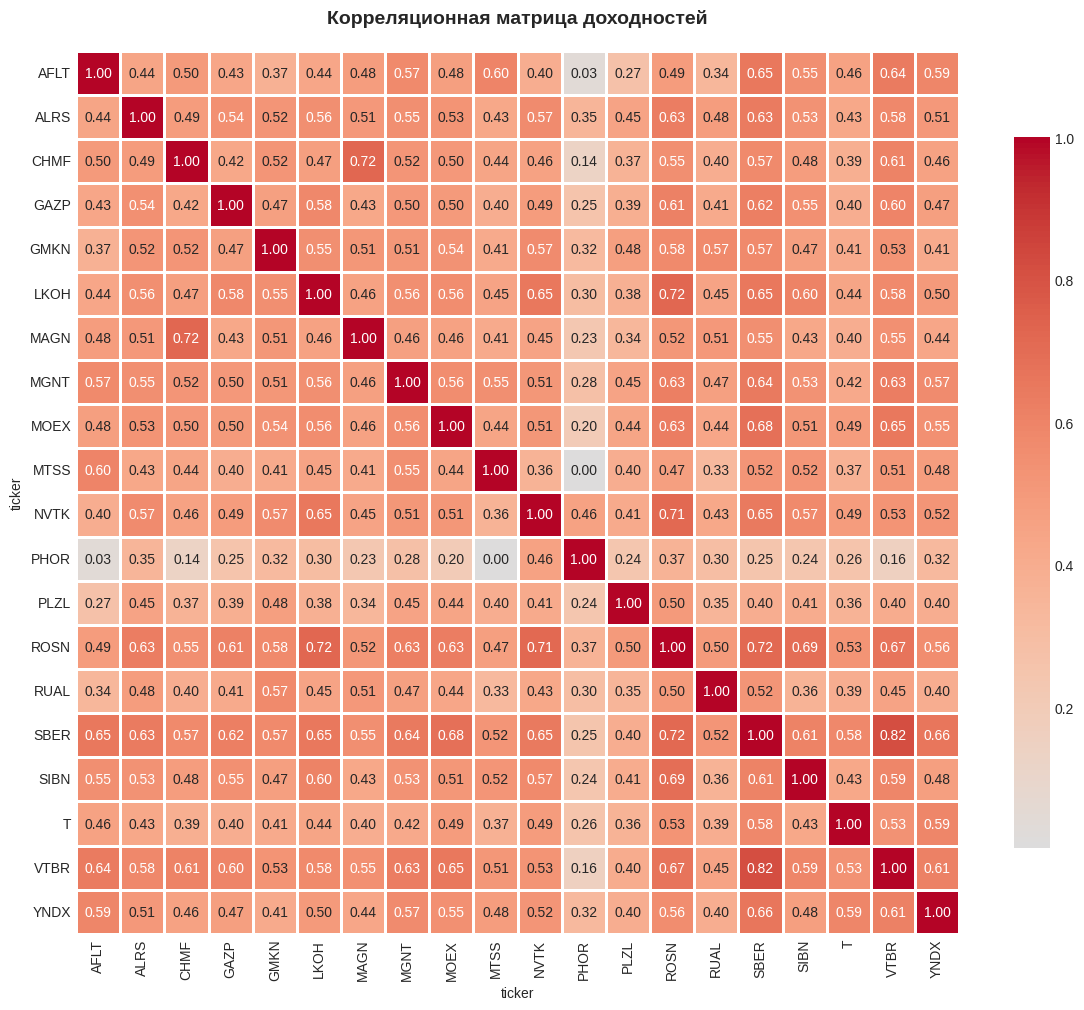


=== Корреляционная матрица доходностей ===
ticker      AFLT      ALRS      CHMF      GAZP      GMKN      LKOH      MAGN  \
ticker                                                                         
AFLT    1.000000  0.440961  0.495355  0.431999  0.372843  0.435261  0.482447   
ALRS    0.440961  1.000000  0.487584  0.542299  0.520709  0.555936  0.507873   
CHMF    0.495355  0.487584  1.000000  0.424273  0.521113  0.472168  0.720090   
GAZP    0.431999  0.542299  0.424273  1.000000  0.467628  0.584871  0.426141   
GMKN    0.372843  0.520709  0.521113  0.467628  1.000000  0.548403  0.509830   
LKOH    0.435261  0.555936  0.472168  0.584871  0.548403  1.000000  0.460413   
MAGN    0.482447  0.507873  0.720090  0.426141  0.509830  0.460413  1.000000   
MGNT    0.573099  0.554414  0.520544  0.504661  0.512888  0.555809  0.464137   
MOEX    0.478184  0.532495  0.503297  0.498396  0.539697  0.563822  0.457795   
MTSS    0.597204  0.430880  0.442000  0.398281  0.409999  0.454721  0.409127

In [58]:
# Корреляция доходностей
pivot_returns = df.pivot_table(index="begin", columns="ticker", values="daily_return", aggfunc="mean")
returns_correlation = pivot_returns.corr()

fig, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(
    returns_correlation,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0,
    square=True,
    linewidths=1,
    cbar_kws={"shrink": 0.8},
    ax=ax,
)
ax.set_title("Корреляционная матрица доходностей", fontsize=14, fontweight="bold", pad=20)
plt.tight_layout()
plt.show()

print("\n=== Корреляционная матрица доходностей ===")
print(returns_correlation)

## 10. Итоговая сводка


In [59]:
print("=" * 80)
print("ИТОГОВАЯ СВОДКА ПО ДАННЫМ")
print("=" * 80)

print(f"\n📊 Общая информация:")
print(f"  - Всего записей: {len(df):,}")
print(f"  - Количество тикеров: {len(tickers)}")
print(f"  - Период данных: {df['begin'].min().date()} - {df['begin'].max().date()}")
print(f"  - Длительность: {(df['begin'].max() - df['begin'].min()).days} дней")

print(f"\n📈 Тикеры:")
print(f"  {', '.join(sorted(tickers))}")

print(f"\n💰 Ценовая статистика:")
print(f"  - Минимальная цена: {df['low'].min():.2f}")
print(f"  - Максимальная цена: {df['high'].max():.2f}")
print(f"  - Средняя цена закрытия: {df['close'].mean():.2f}")

print(f"\n📊 Доходность:")
print(f"  - Средняя дневная доходность: {df['daily_return'].mean() * 100:.4f}%")
print(f"  - Стандартное отклонение: {df['daily_return'].std() * 100:.4f}%")
print(f"  - Минимальная доходность: {df['daily_return'].min() * 100:.2f}%")
print(f"  - Максимальная доходность: {df['daily_return'].max() * 100:.2f}%")

print(f"\n📦 Объемы торгов:")
print(f"  - Средний объем: {df['volume'].mean():,.0f}")
print(f"  - Медианный объем: {df['volume'].median():,.0f}")
print(f"  - Максимальный объем: {df['volume'].max():,.0f}")

print(f"\n⚡ Волатильность:")
for ticker in sorted(tickers):
    ticker_vol = df[df["ticker"] == ticker]["rolling_volatility"].mean()
    print(f"  - {ticker}: {ticker_vol * 100:.4f}%")

print(f"\n✅ Качество данных:")
print(f"  - Пропущенные значения: {df.isnull().sum().sum()}")
print(f"  - Дубликаты: {df.duplicated().sum()}")

print("\n" + "=" * 80)

ИТОГОВАЯ СВОДКА ПО ДАННЫМ

📊 Общая информация:
  - Всего записей: 12,988
  - Количество тикеров: 20
  - Период данных: 2020-06-19 - 2023-02-06
  - Длительность: 962 дней

📈 Тикеры:
  AFLT, ALRS, CHMF, GAZP, GMKN, LKOH, MAGN, MGNT, MOEX, MTSS, NVTK, PHOR, PLZL, ROSN, RUAL, SBER, SIBN, T, VTBR, YNDX

💰 Ценовая статистика:
  - Минимальная цена: 21.44
  - Максимальная цена: 10097.00
  - Средняя цена закрытия: 1464.39

📊 Доходность:
  - Средняя дневная доходность: 0.0279%
  - Стандартное отклонение: 2.6390%
  - Минимальная доходность: -41.25%
  - Максимальная доходность: 33.37%

📦 Объемы торгов:
  - Средний объем: 2,652,584,225
  - Медианный объем: 2,030,910
  - Максимальный объем: 472,628,730,000

⚡ Волатильность:
  - AFLT: 2.0267%
  - ALRS: 2.1670%
  - CHMF: 2.0626%
  - GAZP: 2.3967%
  - GMKN: 1.8691%
  - LKOH: 2.0750%
  - MAGN: 2.1640%
  - MGNT: 1.9546%
  - MOEX: 1.7739%
  - MTSS: 1.5346%
  - NVTK: 2.3211%
  - PHOR: 1.9170%
  - PLZL: 2.2187%
  - ROSN: 2.1148%
  - RUAL: 2.4198%
  - SBER: 

## 9. 🎯 Временные сплиты и маски периодов

Визуализация разбиения данных на train/public/private периоды с embargo-буферами.


In [60]:
import json
from datetime import datetime, timedelta

# Загрузка информации о сплитах
with open("../artifacts/splits.json", "r") as f:
    splits = json.load(f)

# Загрузка календаря
calendar = pd.read_csv("../artifacts/calendar.csv")
calendar["begin"] = pd.to_datetime(calendar["begin"])

print("📅 ИНФОРМАЦИЯ О ПЕРИОДАХ")
print("=" * 80)

for period_name, period_info in splits.items():
    print(f"\n{period_name.upper().replace('_', ' ')}:")
    print(f"  • Индексы: D{period_info['start_idx'] + 1}..D{period_info['end_idx']}")
    print(f"  • Дни: {period_info['days']}")
    if period_info["start_date"]:
        print(f"  • Даты: {period_info['start_date'][:10]} → {period_info['end_date'][:10]}")
    else:
        print(f"  • Даты: —")

print("\n" + "=" * 80)
print(f"ВСЕГО: {len(calendar)} торговых дней")

📅 ИНФОРМАЦИЯ О ПЕРИОДАХ

TRAIN:
  • Индексы: D1..D650
  • Дни: 650
  • Даты: 2020-06-19 → 2023-02-06

EMBARGO 1:
  • Индексы: D651..D675
  • Дни: 25
  • Даты: 2023-02-07 → 2023-03-15

PUBLIC:
  • Индексы: D676..D855
  • Дни: 180
  • Даты: 2023-03-16 → 2023-11-27

EMBARGO 2:
  • Индексы: D856..D880
  • Дни: 25
  • Даты: 2023-11-28 → 2024-01-03

PRIVATE A:
  • Индексы: D881..D1080
  • Дни: 200
  • Даты: 2024-01-04 → 2024-10-15

EMBARGO 3:
  • Индексы: D1081..D1105
  • Дни: 25
  • Даты: 2024-10-16 → 2024-11-19

PRIVATE B:
  • Индексы: D1106..D1270
  • Дни: 165
  • Даты: 2024-11-20 → 2025-06-14

RESERVE:
  • Индексы: D1271..D1274
  • Дни: 4
  • Даты: 2025-06-15 → 2025-06-18

ВСЕГО: 1274 торговых дней


In [61]:
### Таблица периодов

periods_data = []
for period_name, period_info in splits.items():
    periods_data.append({
        "Период": period_name.replace("_", " ").title(),
        "Начало": period_info["start_date"][:10] if period_info["start_date"] else "—",
        "Конец": period_info["end_date"][:10] if period_info["end_date"] else "—",
        "Дней": period_info["days"],
        "Индексы": f"D{period_info['start_idx'] + 1}..D{period_info['end_idx']}",
        "Назначение": {
            "train": "🎓 Обучение модели",
            "embargo_1": "🚫 Буфер (нет оценки)",
            "public": "📊 Public лидерборд",
            "embargo_2": "🚫 Буфер (нет оценки)",
            "private_a": "🔒 Private лидерборд A",
            "embargo_3": "🚫 Буфер (нет оценки)",
            "private_b": "🔒 Private лидерборд B",
            "reserve": "💾 Резерв",
        }[period_name],
    })

periods_df = pd.DataFrame(periods_data)
periods_df.style.set_properties(**{"text-align": "left"})

AttributeError: The '.style' accessor requires jinja2

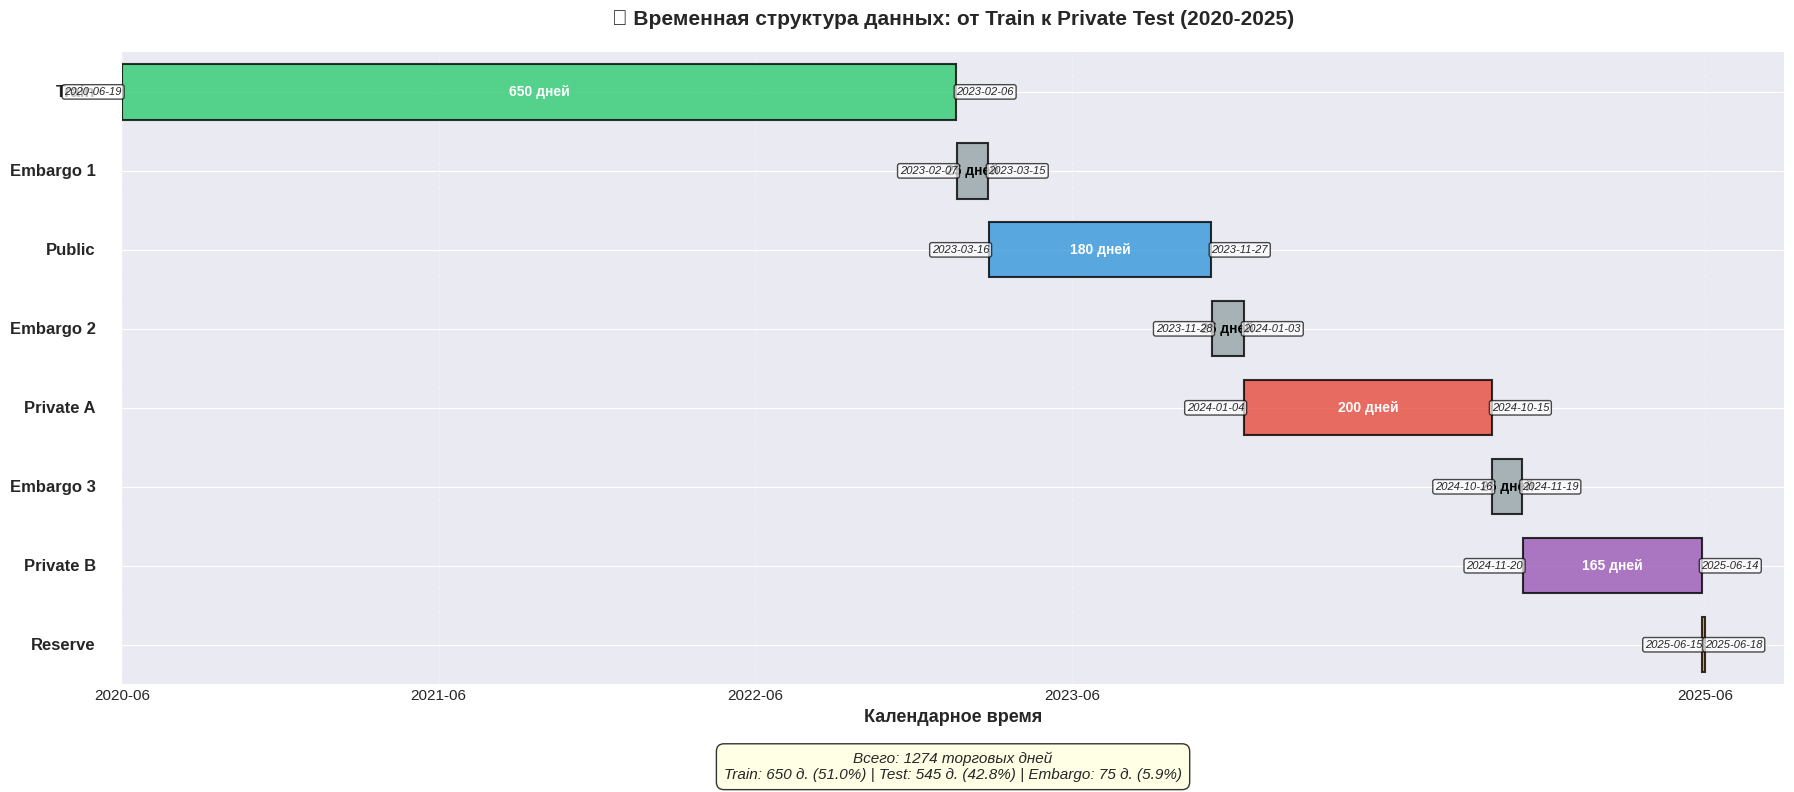


📊 Разбиение данных:
   🟢 Train:     650 дней (51.0%)
   ⚫ Embargo:   75 дней (5.9%)
   🔵 Public:    180 дней (14.1%)
   🔴 Private:   365 дней (28.6%)
   🟠 Reserve:   4 дней (0.3%)


In [62]:
### 9.1. 📅 Календарное представление периодов

fig, ax = plt.subplots(figsize=(18, 8))

# Цветовая схема для периодов
colors = {
    "train": "#2ecc71",  # Зеленый
    "embargo_1": "#95a5a6",  # Серый
    "public": "#3498db",  # Синий
    "embargo_2": "#95a5a6",  # Серый
    "private_a": "#e74c3c",  # Красный
    "embargo_3": "#95a5a6",  # Серый
    "private_b": "#9b59b6",  # Фиолетовый
    "reserve": "#f39c12",  # Оранжевый
}

labels = {
    "train": "Train",
    "embargo_1": "Embargo 1",
    "public": "Public",
    "embargo_2": "Embargo 2",
    "private_a": "Private A",
    "embargo_3": "Embargo 3",
    "private_b": "Private B",
    "reserve": "Reserve",
}

# Создаем бары для каждого периода
periods_order = ["train", "embargo_1", "public", "embargo_2", "private_a", "embargo_3", "private_b", "reserve"]

for i, period_name in enumerate(periods_order):
    period_info = splits[period_name]
    if period_info["start_date"] is None:
        continue

    start_date = pd.to_datetime(period_info["start_date"])
    end_date = pd.to_datetime(period_info["end_date"])

    ax.barh(
        i,
        (end_date - start_date).days,
        left=start_date.toordinal() - calendar.iloc[0]["begin"].toordinal(),
        height=0.7,
        color=colors[period_name],
        alpha=0.8,
        edgecolor="black",
        linewidth=1.5,
    )

    # Метка периода
    ax.text(-30, i, labels[period_name], ha="right", va="center", fontsize=12, fontweight="bold")

    # Количество дней
    ax.text(
        (start_date.toordinal() + end_date.toordinal()) / 2 - calendar.iloc[0]["begin"].toordinal(),
        i,
        f"{period_info['days']} дней",
        ha="center",
        va="center",
        fontsize=10,
        fontweight="bold",
        color="white" if "embargo" not in period_name else "black",
    )

    # Даты начала и конца периода
    ax.text(
        start_date.toordinal() - calendar.iloc[0]["begin"].toordinal(),
        i,
        start_date.strftime("%Y-%m-%d"),
        ha="right",
        va="center",
        fontsize=8,
        style="italic",
        bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7),
    )
    ax.text(
        end_date.toordinal() - calendar.iloc[0]["begin"].toordinal(),
        i,
        end_date.strftime("%Y-%m-%d"),
        ha="left",
        va="center",
        fontsize=8,
        style="italic",
        bbox=dict(boxstyle="round,pad=0.2", facecolor="white", alpha=0.7),
    )

# Настройка осей
ax.set_ylim(-0.5, len(periods_order) - 0.5)
ax.set_yticks(range(len(periods_order)))
ax.set_yticklabels([])
ax.invert_yaxis()

# X-ось: даты
total_days = (calendar.iloc[-1]["begin"] - calendar.iloc[0]["begin"]).days
date_ticks = [0, 365, 730, 1095, total_days]
date_labels = [(calendar.iloc[0]["begin"] + timedelta(days=d)).strftime("%Y-%m") for d in date_ticks]
ax.set_xticks(date_ticks)
ax.set_xticklabels(date_labels, rotation=0, fontsize=11)

ax.set_xlabel("Календарное время", fontsize=13, fontweight="bold")
ax.set_title(
    "📅 Временная структура данных: от Train к Private Test (2020-2025)", fontsize=15, fontweight="bold", pad=20
)
ax.grid(axis="x", alpha=0.3, linestyle="--")

# Добавляем легенду с процентами
legend_text = f"Всего: {len(calendar)} торговых дней\n"
legend_text += f"Train: {650} д. ({650 / 1274 * 100:.1f}%) | Test: {545} д. ({545 / 1274 * 100:.1f}%) | Embargo: {75} д. ({75 / 1274 * 100:.1f}%)"
ax.text(
    0.5,
    -0.15,
    legend_text,
    transform=ax.transAxes,
    ha="center",
    fontsize=11,
    style="italic",
    bbox=dict(boxstyle="round,pad=0.5", facecolor="lightyellow", alpha=0.8),
)

plt.tight_layout()
plt.show()

print("\n📊 Разбиение данных:")
print(f"   🟢 Train:     {650} дней ({650 / 1274 * 100:.1f}%)")
print(f"   ⚫ Embargo:   {25 + 25 + 25} дней ({75 / 1274 * 100:.1f}%)")
print(f"   🔵 Public:    {180} дней ({180 / 1274 * 100:.1f}%)")
print(f"   🔴 Private:   {200 + 165} дней ({365 / 1274 * 100:.1f}%)")
print(f"   🟠 Reserve:   {4} дней ({4 / 1274 * 100:.1f}%)")

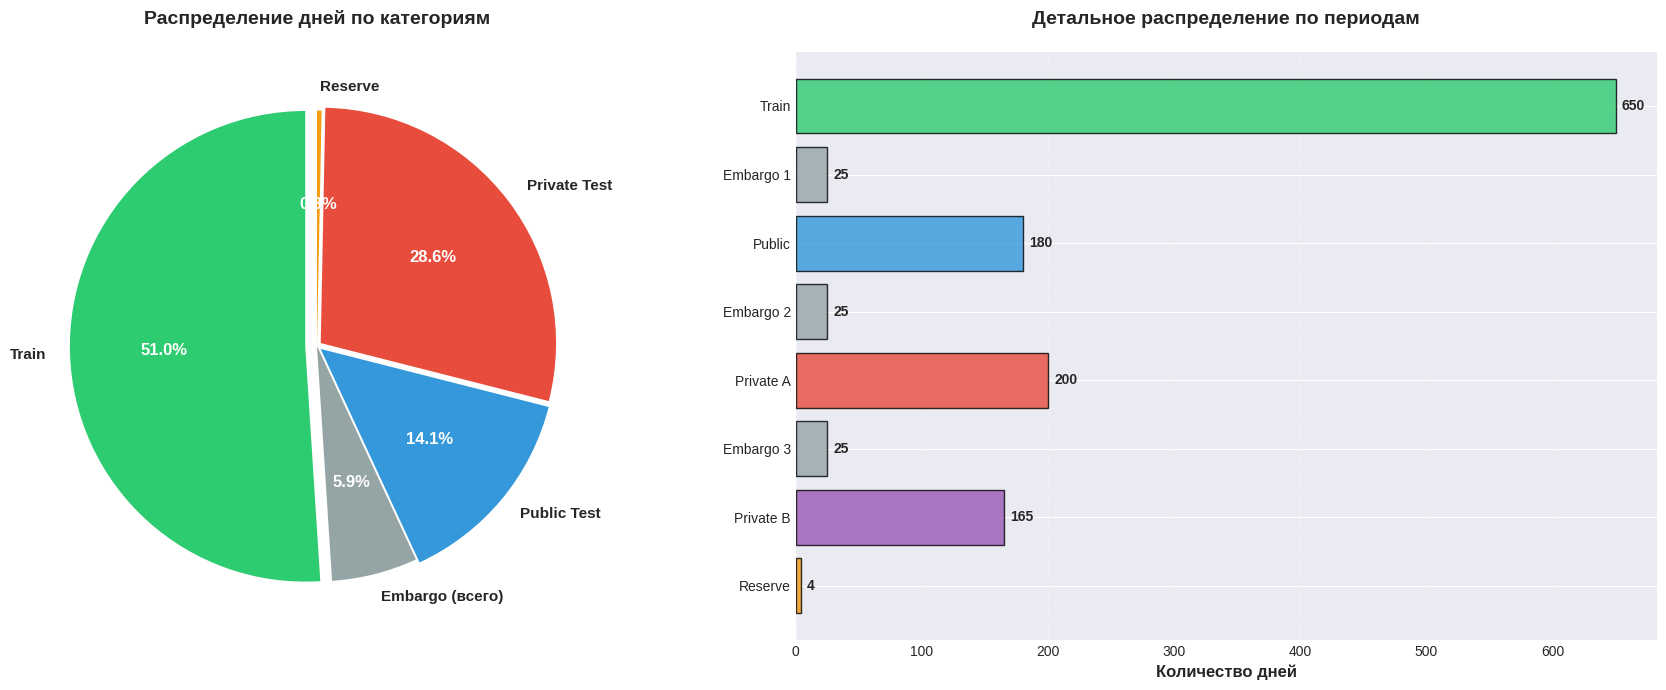

In [64]:
### 9.3. Круговая диаграмма распределения дней

# Подготовка данных для pie chart
categories = {"Train": 650, "Embargo (всего)": 75, "Public Test": 180, "Private Test": 365, "Reserve": 4}

colors_pie = ["#2ecc71", "#95a5a6", "#3498db", "#e74c3c", "#f39c12"]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 7))

# Pie chart
wedges, texts, autotexts = ax1.pie(
    categories.values(),
    labels=categories.keys(),
    colors=colors_pie,
    autopct="%1.1f%%",
    startangle=90,
    explode=[0.05, 0, 0.02, 0.02, 0],
    textprops={"fontsize": 11, "fontweight": "bold"},
)

for autotext in autotexts:
    autotext.set_color("white")
    autotext.set_fontsize(12)

ax1.set_title("Распределение дней по категориям", fontsize=14, fontweight="bold", pad=20)

# Bar chart для детального разбиения
detailed_data = []
detailed_colors = []
detailed_labels = []

for period_name in periods_order:
    period_info = splits[period_name]
    detailed_data.append(period_info["days"])
    detailed_colors.append(colors[period_name])
    detailed_labels.append(labels[period_name])

bars = ax2.barh(
    range(len(detailed_data)), detailed_data, color=detailed_colors, alpha=0.8, edgecolor="black", linewidth=1
)

ax2.set_yticks(range(len(detailed_labels)))
ax2.set_yticklabels(detailed_labels)
ax2.set_xlabel("Количество дней", fontsize=12, fontweight="bold")
ax2.set_title("Детальное распределение по периодам", fontsize=14, fontweight="bold", pad=20)
ax2.grid(axis="x", alpha=0.3, linestyle="--")
ax2.invert_yaxis()

# Добавляем значения на бары
for i, (bar, days) in enumerate(zip(bars, detailed_data)):
    ax2.text(days + 5, i, f"{days}", va="center", fontsize=10, fontweight="bold")

plt.tight_layout()
plt.show()

🔑 СТАТИСТИКА ПО КЛЮЧАМ ОЦЕНКИ

📊 Public Keys (публичный лидерборд):
  • Всего ключей: 3,600
  • Уникальных дат: 180
  • Уникальных тикеров: 20
  • Период: 180 дней × 20 тикеров = 3,600 ключей

🔒 Private A Keys:
  • Всего ключей: 4,000
  • Период: 200 дней × 20 тикеров = 4,000 ключей

🔒 Private B Keys:
  • Всего ключей: 3,300
  • Период: 165 дней × 20 тикеров = 3,300 ключей

ИТОГО ключей для оценки: 10,900
  (545 дней × 20 тикеров)


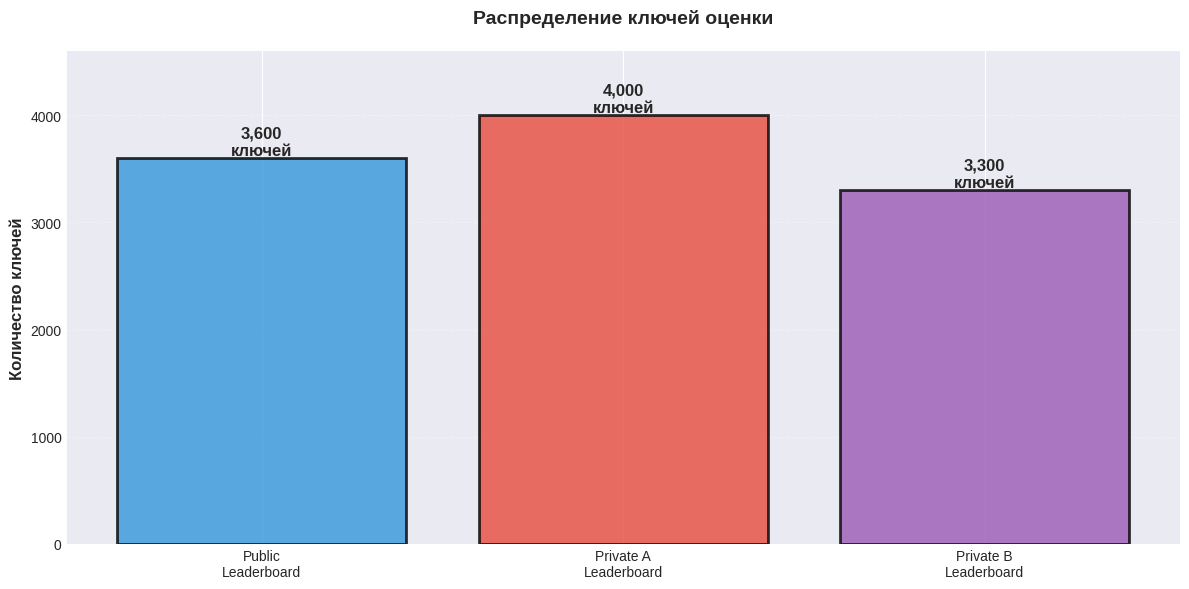

In [65]:
### 9.4. Статистика по ключам оценки

# Загрузка ключей
public_keys = pd.read_csv("../data/processed/public_keys.csv")
private_a_keys = pd.read_csv("../data/hidden/privateA_keys.csv")
private_b_keys = pd.read_csv("../data/hidden/privateB_keys.csv")

print("🔑 СТАТИСТИКА ПО КЛЮЧАМ ОЦЕНКИ")
print("=" * 80)

print("\n📊 Public Keys (публичный лидерборд):")
print(f"  • Всего ключей: {len(public_keys):,}")
print(f"  • Уникальных дат: {public_keys['begin'].nunique()}")
print(f"  • Уникальных тикеров: {public_keys['ticker'].nunique()}")
print(f"  • Период: {180} дней × {20} тикеров = {180 * 20:,} ключей")

print("\n🔒 Private A Keys:")
print(f"  • Всего ключей: {len(private_a_keys):,}")
print(f"  • Период: {200} дней × {20} тикеров = {200 * 20:,} ключей")

print("\n🔒 Private B Keys:")
print(f"  • Всего ключей: {len(private_b_keys):,}")
print(f"  • Период: {165} дней × {20} тикеров = {165 * 20:,} ключей")

print("\n" + "=" * 80)
total_eval_keys = len(public_keys) + len(private_a_keys) + len(private_b_keys)
print(f"ИТОГО ключей для оценки: {total_eval_keys:,}")
print(f"  ({180 + 200 + 165} дней × {20} тикеров)")

# Визуализация
fig, ax = plt.subplots(figsize=(12, 6))

categories = ["Public\nLeaderboard", "Private A\nLeaderboard", "Private B\nLeaderboard"]
values = [len(public_keys), len(private_a_keys), len(private_b_keys)]
colors_keys = ["#3498db", "#e74c3c", "#9b59b6"]

bars = ax.bar(categories, values, color=colors_keys, alpha=0.8, edgecolor="black", linewidth=2)

# Добавляем значения на бары
for bar, value in zip(bars, values):
    height = bar.get_height()
    ax.text(
        bar.get_x() + bar.get_width() / 2.0,
        height,
        f"{value:,}\nключей",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
    )

ax.set_ylabel("Количество ключей", fontsize=12, fontweight="bold")
ax.set_title("Распределение ключей оценки", fontsize=14, fontweight="bold", pad=20)
ax.grid(axis="y", alpha=0.3, linestyle="--")
ax.set_ylim(0, max(values) * 1.15)

plt.tight_layout()
plt.show()

⚠️  ВАЖНО: ВРЕМЕННЫЕ ИНВАРИАНТЫ

🔒 Правила доступности данных:
   1. Для прогноза на день t:
      ✓ Можно использовать: цены закрытия ≤ t
      ✓ Можно использовать: новости с датой публикации ≤ t-1 (лаг 1 день)
      ✗ Нельзя использовать: любые данные с датой > t

🚫 Embargo-периоды (буферы между train и test):
   • Embargo 1: 25 дней между Train и Public
   • Embargo 2: 25 дней между Public и Private A
   • Embargo 3: 25 дней между Private A и Private B
   
   Назначение: предотвратить утечку данных через модели,
   обученные на близких по времени данных

📅 Последовательность использования:
   1️⃣  Train (650 дней) → обучение модели
   2️⃣  Embargo → пропускаем, не используем
   3️⃣  Public (180 дней) → публичный лидерборд
   4️⃣  Embargo → пропускаем, не используем
   5️⃣  Private A+B (365 дней) → финальная оценка



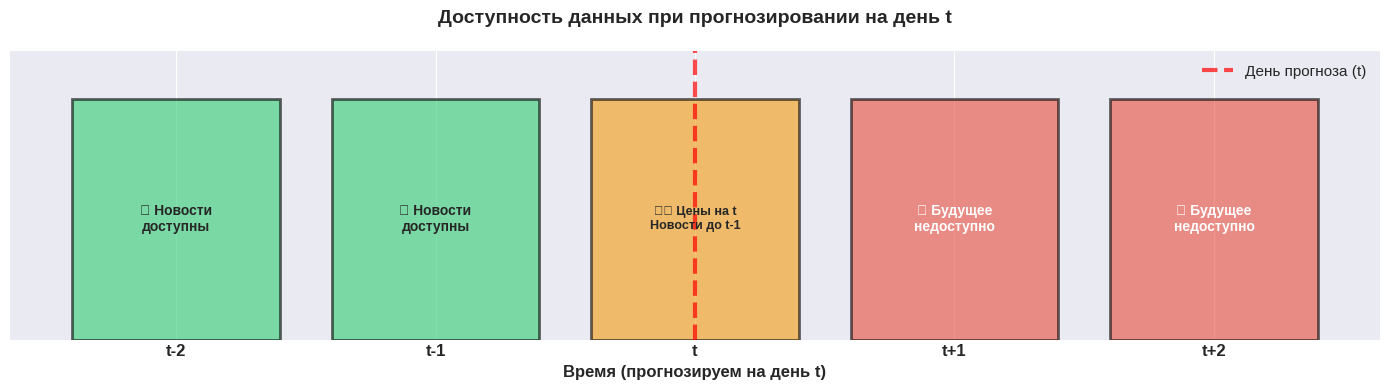

In [66]:
### 9.5. Временные инварианты и embargo-периоды

print("⚠️  ВАЖНО: ВРЕМЕННЫЕ ИНВАРИАНТЫ")
print("=" * 80)

print("\n🔒 Правила доступности данных:")
print("   1. Для прогноза на день t:")
print("      ✓ Можно использовать: цены закрытия ≤ t")
print("      ✓ Можно использовать: новости с датой публикации ≤ t-1 (лаг 1 день)")
print("      ✗ Нельзя использовать: любые данные с датой > t")

print("\n🚫 Embargo-периоды (буферы между train и test):")
print("   • Embargo 1: 25 дней между Train и Public")
print("   • Embargo 2: 25 дней между Public и Private A")
print("   • Embargo 3: 25 дней между Private A и Private B")
print("   ")
print("   Назначение: предотвратить утечку данных через модели,")
print("   обученные на близких по времени данных")

print("\n📅 Последовательность использования:")
print("   1️⃣  Train (650 дней) → обучение модели")
print("   2️⃣  Embargo → пропускаем, не используем")
print("   3️⃣  Public (180 дней) → публичный лидерборд")
print("   4️⃣  Embargo → пропускаем, не используем")
print("   5️⃣  Private A+B (365 дней) → финальная оценка")

print("\n" + "=" * 80)

# Визуализация временного лага для новостей
fig, ax = plt.subplots(figsize=(14, 4))

# Пример временной шкалы
days = list(range(5))
day_labels = ["t-2", "t-1", "t", "t+1", "t+2"]

# Доступные данные
available = [1, 1, 0.5, 0, 0]  # Полные данные до t-1, частичные на t
colors_lag = ["#2ecc71", "#2ecc71", "#f39c12", "#e74c3c", "#e74c3c"]

bars = ax.bar(days, [1] * 5, color=colors_lag, alpha=0.6, edgecolor="black", linewidth=2)

# Аннотации
ax.text(0, 0.5, "✓ Новости\nдоступны", ha="center", va="center", fontweight="bold", fontsize=10)
ax.text(1, 0.5, "✓ Новости\nдоступны", ha="center", va="center", fontweight="bold", fontsize=10)
ax.text(2, 0.5, "⚠️ Цены на t\nНовости до t-1", ha="center", va="center", fontweight="bold", fontsize=9)
ax.text(3, 0.5, "✗ Будущее\nнедоступно", ha="center", va="center", fontweight="bold", fontsize=10, color="white")
ax.text(4, 0.5, "✗ Будущее\nнедоступно", ha="center", va="center", fontweight="bold", fontsize=10, color="white")

ax.set_xticks(days)
ax.set_xticklabels(day_labels, fontsize=12, fontweight="bold")
ax.set_ylim(0, 1.2)
ax.set_yticks([])
ax.set_xlabel("Время (прогнозируем на день t)", fontsize=12, fontweight="bold")
ax.set_title("Доступность данных при прогнозировании на день t", fontsize=14, fontweight="bold", pad=20)

# Вертикальная линия на день t
ax.axvline(2, color="red", linewidth=3, linestyle="--", alpha=0.7, label="День прогноза (t)")
ax.legend(loc="upper right", fontsize=11)

plt.tight_layout()
plt.show()